This notebook has as aim to describe briefly the Monte Carlo method, to understand one of the basic operations, <b>numerical integration</b>. I do consider could be important, or at least interesting, to learn about the origin of this method, and maybe to take account the initial objective of it.

# Very Brief History

This method was consider as experimental in maths field, specially if we do consider the ordinary mathematics insights. Usually the ordinary mathematics methods make use of deduction postulates, where conclutions appear from postulates. In the other hand we can see methods which make use of induction, where conclutions are inferred from observations, like <a href="https://www.researchgate.net/publication/227019413_The_Monte_Carlo_Method_an_Introduction">Detlev Reiter</a> said (page 2).

The first intuition of MC using is dated to 1777, where George-Louis Leclerc, comte de Buffon, mathematician and naturalist, exposed a problem known as Buffon´s needle problem. This problem is described as: having a ruled sheet by parallel lines, we want to know the probability a tossed needle can fall into the lines without to touch any parallel line in the sheet. to see <a href="http://www.cs.fsu.edu/~mascagni/MC_Basics.pdf">Mascagni, M</a> and <a href="https://indico.lucas.lu.se/event/932/session/0/contribution/2/material/slides/0.pdf">Wright, D</a>.

After, when computers in digital era begin to be used to compute some problems, John von Neuman and Stanislaw Ulam use the MC method in thermonuclear weapon development, and from then the method is known as Monte Carlo Method, to see Detlev Reiter, page 3.

# Some utilities

This method is used to some task, as is described by <a href="https://www.springer.com/gp/book/9789811329708">Barbu, A. and Zhu, S.</a>, page 2. This task could be (taking textual quotes):

* Simulating a system and its probability distribution $\pi(x)$

    $x \thicksim \pi(x)$


* Estimating a quantity through MC integration

    $c = E_\pi(f(x)) = \int\pi(x)f(x)dx$
    
    
* Optimizing a target function to find its modes (maxima or minima)

    $x^* = argmax\pi(x)$


* Learning parameters from a training set to optimize some loss funtion, such as the maximum likelihood estimation from a set of examples $\{ x_i, i=1,2,3,... \}$
    
    $\Theta^* = argmax\sum_{i=1}^{M} log p(x_i;\Theta)$

## Estimating Monte Carlo Integration
<a href="https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration">source</a> ... and of course, my Lab2 class of Master in Finance, given by <a href="https://www.uexternado.edu.co/cipe/john-freddy-moreno-coordinador-de-observatorio-odeon/">John Moreno</a>.

Supose $f(x)$ is a one dimensional probability density function (pdf) and $F(x)$ is the cumulative density function (cdf). The relation between them, is:

$ F(x) = \int_{-\infty}^{x} f(x) dx $

Now consider:

$E[ f(x) ] = \int f(x) \pi_x(x) dx$

where $\pi_x(x)$ is the probability distribution of the random variable $x$. The most common distribution used to calculate integrals are the uniform distribution, because it is easy to include within formula.

Remember the pdf of it, looks like this:

$f_{uniform}(x)= \left\{ \begin{array}{lcc}
             \frac{1}{b-a} &   if  & x \in (a,b) \\
             0 &   if  & x \notin (a,b) \\
             \end{array}
   \right.$
   
In this way, if $\pi(x) = f_{uniform}(x)$, then:

$E[ f(x) ] = \int_{a}^{b} f(x) \frac{1}{b-a} dx$

Remembering that the constant can out of integral, we turn it as:

$E[ f(x) ] = \frac{1}{b-a} \int_{a}^{b} f(x)  dx$

If we solve the integral, we get some like this:

$ (b-a) E[ f(x) ] = \int_{a}^{b} f(x)  dx$

But, the question is, what is $E[f(x)]$?. Well, by the <a href="https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php">law of large numbers</a>, we get:

$\hat V = E[ f(x) ] \approx \frac{1}{n}\sum_{i=1}^{n}f(x)$

Until now we get all pieces to calculate the integral, as follow:

$ (b-a) \frac{1}{n}\sum_{i=1}^{n}f(x) \approx \int_{a}^{b} f(x)  dx$

So, an example of this .... but before, do not forget $x$ is a random variable, in this case is a uniform random variable.

## Functions we need to calculate MC Integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Setting the random seed to replicate the results

In [2]:
np.random.seed(100)

In [3]:
# Using a high order function
def calculate_v_hat(numbers, function):
    return function(numbers).mean()

def build_table_massive_results(values, errors):
    df_values = pd.DataFrame().from_dict(values).T
    columns_to_melt = list(df_values.columns)
    df_values = df_values.reset_index(drop=False)
    df_values.rename(columns={'index':'num_simulations'}, inplace=True)
    df_melt_values = pd.melt(df_values,id_vars=['num_simulations'], value_vars=columns_to_melt)
    df_melt_values.rename(columns={'value':'integral_value'}, inplace=True)
    del df_melt_values['variable'], df_values, columns_to_melt
    
    df_errors = pd.DataFrame().from_dict(errors).T
    columns_to_melt = list(df_errors.columns)
    df_errors = df_errors.reset_index(drop=False)
    df_errors.rename(columns={'index':'num_simulations'}, inplace=True)
    df_errors.columns = list(df_errors.columns)
    df_melt_errors = pd.melt(df_errors,id_vars=['num_simulations'], value_vars=columns_to_melt)
    df_melt_errors.rename(columns={'value':'error'}, inplace=True)
    del df_melt_errors['variable'], df_errors
    
    return df_melt_values, df_melt_errors

## Example of MC Integration

Supose you do have the function $e^x$ and you want to get the value of the following integral:

$I = \int_{1}^{5}e^x$

Solving this integral by common way:

$\int e^x = e^x + k$

Now by the second fundamental theorem of calculous:

$\int_{1}^{5} e^x = e^5 - e^1 \approx 145.6948773...$

In [4]:
correct_value_of_integral = 145.6948773 #Approx
limit_inf = 1
limit_sup = 5
function = np.exp
number_of_simulations = 10
uniform_numbers = np.random.uniform(limit_inf,limit_sup,number_of_simulations)
v_hat = calculate_v_hat(numbers=uniform_numbers, function=function)

In [5]:
value_integral = (limit_sup-limit_inf) * v_hat
print('The integral´s value is : {value}'.format(value=value_integral))
print('Error \t\t\t: {error_value}'.format(error_value=correct_value_of_integral-value_integral))
print('Num. Simulations \t: {number_of_simulations}'.format(number_of_simulations=number_of_simulations))


The integral´s value is : 111.80615183269265
Error 			: 33.88872546730735
Num. Simulations 	: 10


## Plots

As you can see, before I got an error when I calculate the value of integral by Monte Carlo method, but we can not forget the law of large numbers. In this way we need to pass a considerable amount of simulated numbers to get a most closed value to real value. To compare the error between this amount of numbers we can see following:

In [6]:
number_of_simulations = np.array([5e3,8e4,1e5,5e5,7e5,2e6,3e6,5e6,6e6,7e6,8e6],dtype=int)
errors_ = {}
values_ = {}
number_samples_by_amount = 10 # Number of samples to calculate by amount of simulations
for numbers_ in number_of_simulations:
    errors_[numbers_] = []
    values_[numbers_] = []
    for simulation in range(number_samples_by_amount):
        uniform_numbers = np.random.uniform(limit_inf,limit_sup,numbers_)
        v_hat = calculate_v_hat(numbers=uniform_numbers, function=function)
        value_integral = (limit_sup-limit_inf) * v_hat
        errors_[numbers_].append(correct_value_of_integral-value_integral)
        values_[numbers_].append(value_integral)

In [7]:
df_values, df_errors = build_table_massive_results(values=values_, errors=errors_)

### Plot of MC Integral

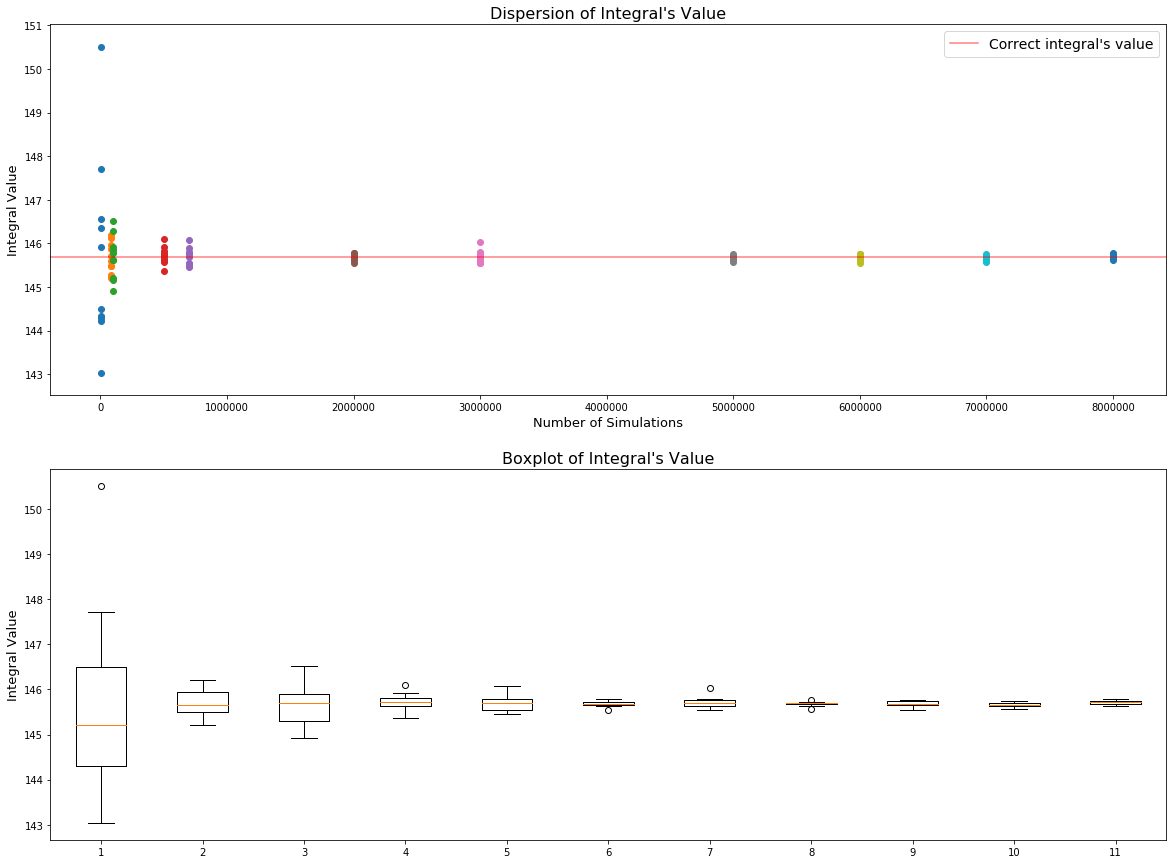

In [8]:
plt.figure(figsize=(20,15))
groups_by_n_simulations = []

plt.subplot(2,1,1)
plt.axhline(y=correct_value_of_integral, c='red', alpha=0.5, label='Correct integral\'s value')
for i in number_of_simulations:
    data2plot = df_values[df_values['num_simulations'] == i].copy()
    plt.scatter(data2plot['num_simulations'],data2plot['integral_value'])
plt.xlabel('Number of Simulations', fontsize=13)
plt.ylabel('Integral Value', fontsize=13)
plt.title('Dispersion of Integral\'s Value', fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,1,2)
for i in number_of_simulations:
    data2plot = df_values[df_values['num_simulations'] == i].copy()
    groups_by_n_simulations.append(data2plot['integral_value'])
plt.boxplot(groups_by_n_simulations)
plt.ylabel('Integral Value', fontsize=13)
plt.title('Boxplot of Integral\'s Value', fontsize=16)

plt.show()

### Plot of MC Integral Error

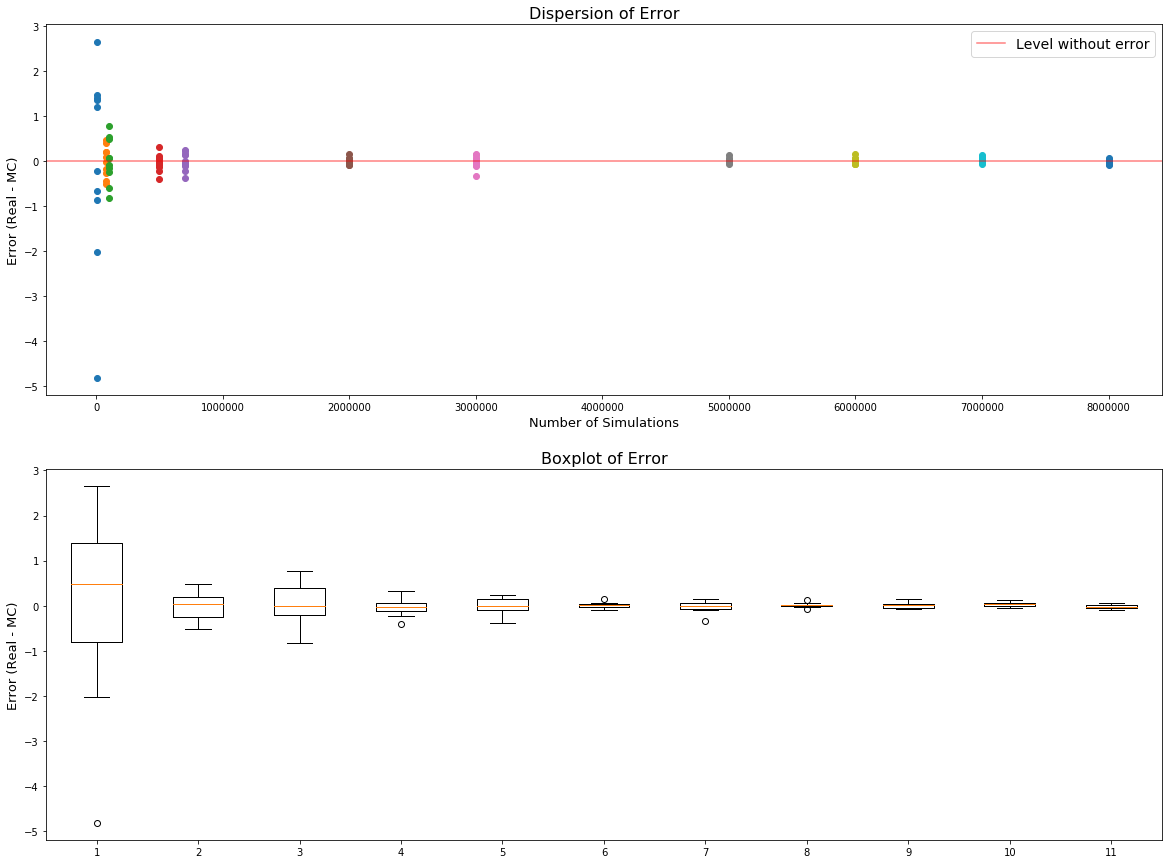

In [9]:
plt.figure(figsize=(20,15))
groups_by_n_simulations = []

plt.subplot(2,1,1)
plt.axhline(y=0, c='red', alpha=0.5, label='Level without error')
for i in number_of_simulations:
    data2plot = df_errors[df_errors['num_simulations'] == i].copy()
    plt.scatter(data2plot['num_simulations'],data2plot['error'])
plt.xlabel('Number of Simulations', fontsize=13)
plt.ylabel('Error (Real - MC)', fontsize=13)
plt.title('Dispersion of Error', fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,1,2)
for i in number_of_simulations:
    data2plot = df_errors[df_errors['num_simulations'] == i].copy()
    groups_by_n_simulations.append(data2plot['error'])
plt.boxplot(groups_by_n_simulations)
plt.ylabel('Error (Real - MC)', fontsize=13)
plt.title('Boxplot of Error', fontsize=16)

plt.show()

# Conclusion

The MC method to calculate an integral, defined between (a,b) could be solved by MC method, but the precision will depend of the amount of numbers simulated to calculate $\hat V$. In this way, we can see while the number of simulations are inreasing, the error of real value versus MC Integration will go decreasing, following the law of large numbers.

If we take into account confidence interval as following, we can see that while the amount of numbers simulated to calculate $\hat V$, will go decrease the confidence interval gap, asuming the variance $\sigma_{x_i}$ fixed, as uniform probability density function variance:

$CI \longrightarrow \left[\hat V - \frac{Z_{\frac{-\alpha}{2}}\sigma_{x_i}}{\sqrt{n}} , \hat V + \frac{Z_{\frac{\alpha}{2}}\sigma_{x_i}}{\sqrt{n}}\right].$

# Blibliography and Cybergraphy

* <b>Asai, M. (2018)</b>. <a href="https://indico.lucas.lu.se/event/932/session/0/contribution/2/material/slides/0.pdf">Basics of Monte Carlo Simulation</a>
* <b>Barbu, A. & Zhu, S. (2020)</b>. Monte Carlo Methods. Springer Editorial.
* <b>Mascagni, M.</b> <a href="http://www.cs.fsu.edu/~mascagni/MC_Basics.pdf">Monte Carlo Methods: Early History and The Basics</a>
* <a href="https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration">Monte Carlo Methods in Practice</a>
* <b>Reiter, D. (2007)</b>. The Monte Carlo Method, an Introduction


<hr>

This could not to be the final version, so if you have some recommendation or comment about this, I will be grateful to hear it, using e-mail <b>craquinterogo@unal.edu.co</b> or <b>cristian.quintero@est.uexternado.edu.co</b>